In [ ]:
'''
Implement Simple Naïve Bayes classification algorithm
using Python/R on iris.csv dataset. Compute Confusion
matrix to find TP, FP, TN, FN, Accuracy, Error rate,
Precision, Recall on the given dataset.
'''
import pandas as pd
import numpy as np
import seaborn as sns

In [ ]:
df=sns.load_dataset('iris')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [ ]:
df.dtypes

,0
sepal_length,float64
sepal_width,float64
petal_length,float64
petal_width,float64
species,object


In [ ]:
Q1=df.iloc[:,:-1].quantile(0.25)
Q3=df.iloc[:,:-1].quantile(0.75)

IQR=Q3-Q1

lower_bound=Q1-1.5*IQR
upper_bound=Q3+1.5*IQR

df_filtered=df[~((df.iloc[:,:-1]<lower_bound) | (df.iloc[:,:-1]>upper_bound)).any(axis=1)]
df_filtered.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [ ]:
x=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder=LabelEncoder()
y=label_encoder.fit_transform(y)

In [ ]:
from sklearn.model_selection import train_test_split
# Train-test split (80-20 for better accuracy)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(x_train, y_train)

GaussianNB()

In [ ]:
y_pred = gnb.predict(x_test)

In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score

# Compute Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Compute TP, FP, FN, TN for Multi-Class
TP = np.diag(cm)  # True Positives (Diagonal elements)
FP = cm.sum(axis=0) - TP  # False Positives (Column sum - TP)
FN = cm.sum(axis=1) - TP  # False Negatives (Row sum - TP)
TN = cm.sum() - (TP + FP + FN)  # True Negatives (Total sum - others)

# Compute Performance Metrics
accuracy = accuracy_score(y_test, y_pred)
error_rate = 1 - accuracy
precision = precision_score(y_test, y_pred, average='macro')  # 'macro' for multi-class
recall = recall_score(y_test, y_pred, average='macro')

# Display Results
print("Confusion Matrix:\n", cm)
print(f"Accuracy: {accuracy:.4f}")
print(f"Error Rate: {error_rate:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")

# Print TP, FP, FN, TN for each class
for i, class_name in enumerate(np.unique(y_test)):  # Assuming label encoding
    print(f"\nClass: {class_name}")
    print(f"TP: {TP[i]}, FP: {FP[i]}, FN: {FN[i]}, TN: {TN[i]}")


Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
Accuracy: 1.0000
Error Rate: 0.0000
Precision: 1.0000
Recall: 1.0000

Class: 0
TP: 10, FP: 0, FN: 0, TN: 20

Class: 1
TP: 9, FP: 0, FN: 0, TN: 21

Class: 2
TP: 11, FP: 0, FN: 0, TN: 19


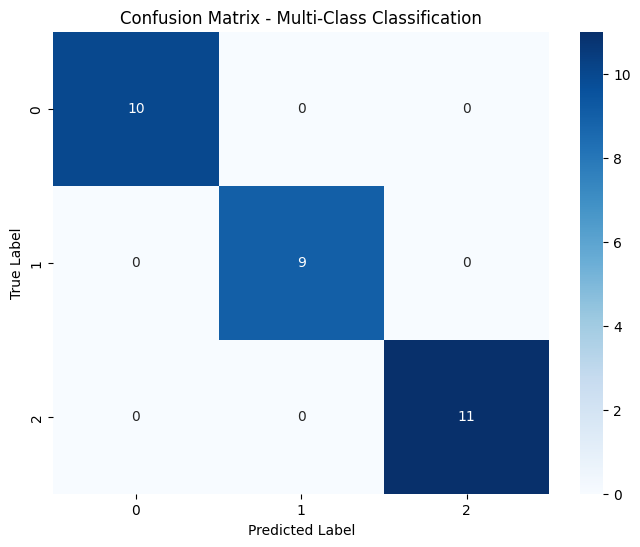

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=np.unique(y_test),
            yticklabels=np.unique(y_test))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - Multi-Class Classification')
plt.show()
